In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization,ZeroPadding2D, Flatten, Dense,Input
from keras.applications.vgg16 import VGG16
from keras import backend as K
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [2]:
vgg = VGG16(include_top=True)
IMAGE_SIZE = (224,224)


In [3]:
def myModel():
    model = Sequential([
    Conv2D(64, (3, 3), input_shape=(*IMAGE_SIZE,3), padding='same', activation="relu"),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    Conv2D(128, (3, 3), activation="relu", padding="same",),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation="relu", padding="same",),
    Conv2D(256, (3, 3), activation="relu", padding="same",),
    Conv2D(256, (3, 3), activation="relu", padding="same",),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation="relu", padding="same",),
    Conv2D(512, (3, 3), activation="relu", padding="same",),
    Conv2D(512, (3, 3), activation="relu", padding="same",),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation="relu", padding="same",),
    Conv2D(512, (3, 3), activation="relu", padding="same",),
    Conv2D(512, (3, 3), activation="relu", padding="same",),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation="relu"),
    Dense(4096, activation="relu"),
    Dense(1000, activation=None)])
    return model

model  = myModel()
model.set_weights(vgg.get_weights())
model.trainable=False

84

In [134]:
FILE_NAME="peacock.jpg"
INDEX=84
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
# for gradient 
output = model.output
score1 = K.sum(output[0,:INDEX])
score2 = K.sum(output[0,INDEX+1:])
score = K.sum([score1,score2])
grads = K.gradients(score, model.input)[0]
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
iterate = K.function([model.input], [score, grads])

def train_step(image,mask):
    # we dont have output here! 
    score, grads = iterate(image)
    mask = mask+ 0.01*grads
    image = image - 0.01*grads
    return image,mask
    

In [157]:
at_first_image = np.array(Image.open(FILE_NAME).resize(IMAGE_SIZE))
image= np.expand_dims(at_first_image,0)
image = tf.Variable(image, dtype=tf.float32)


In [158]:
mask = np.zeros((*IMAGE_SIZE,3))
for i in range(100):
    image,mask = train_step(image,mask)

In [159]:
image = image/255.0
image = np.squeeze(image)
mask = np.squeeze(mask)
at_first_image = at_first_image/255.0


In [161]:
mask = mask/np.max(mask)
# mask_img = np.where(mask>0.1,mask,0.2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


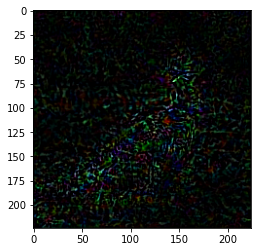

In [163]:
plt.imshow(mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


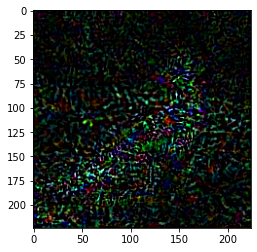

In [105]:
plt.imshow(mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


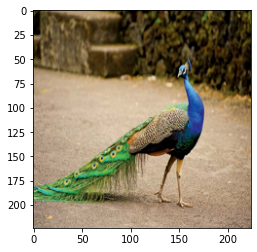

In [106]:
plt.imshow(image)

In [200]:
x = tf.Variable(4.0)
y = tf.multiply(x,x)
grads = K.gradients(y,x)[0]
print(grads)


None
